TypeError: Invalid shape (60000, 28, 28) for image data

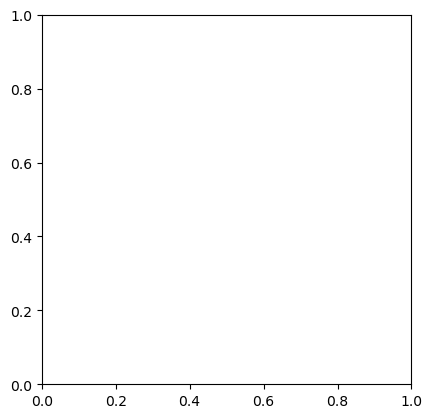

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
import numpy as np

"""
手写数字识别
"""

# 相关设置
np.set_printoptions(suppress=True)

# 导入数据
(x,y) ,(test, test_label) = mnist.load_data()

In [ ]:
# 预处理训练数据和测试数据
# 将三维图片转化为一维向量
train_x = x.reshape(60000,784).astype('float32')
test_x = test.reshape(10000,784).astype('float32')

# 图像标签预处理
label = tf.one_hot(y,10)

In [218]:
# 创建神经网络
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30,'relu'),
    tf.keras.layers.Dense(30,'relu'),
    tf.keras.layers.Dense(30,'relu'),
    tf.keras.layers.Dense(30,'relu'),
    tf.keras.layers.Dense(10,'softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy')

# 训练
model.fit(train_x,label,epochs=10)

# 预测
z = model.predict(test_x)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8333
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3075
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2523
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2180
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1901
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1708
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1586
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1512
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1426
Epoch 10/10
313/313 [==============================] - 0s 911us/step


In [219]:
# 评估模型
result = np.argmax(z,axis=1)
acc = Accuracy()
acc.update_state(test_label,result)
print(f'正确率：{acc.result()}')

正确率：0.9501000046730042


In [1]:
# 可视化预测结果
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(test[i - 1])
    plt.title(result[i - 1])

NameError: name 'plt' is not defined